In [11]:
#Importing all the necessary packages
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
#clean_data.csv is the dataset from Kaggle's Women VolleyballPlayers
#https://www.kaggle.com/datasets/johnpendenque/women-volleyball-players

dd = pd.read_csv("clean_data.csv")
df=pd.DataFrame(dd)

#Player index 68,212 and 356 didn't have a spike or block height
df=df.drop([df.index[68],df.index[212],df.index[356]])
df

,index,name,date_of_birth,height,weight,spike,block,position_number,country
0,0,Angelina Lazarenko,13/04/1998,193,80,320,305,3,23
1,1,Svetlana Serbina,15/05/1996,182,71,295,284,1,23
2,2,Ekaterina Shkurikhina,17/06/1996,190,72,306,296,2,23
3,3,Kristina Kurnosova,17/06/1997,176,62,288,278,6,23
4,4,Ekaterina Novikova,07/12/1996,181,70,290,275,1,23
...,...,...,...,...,...,...,...,...,...
427,427,Yagmur Mislina Kilic,30/03/1996,189,66,283,280,2,26
428,428,Cemre Janset Erkul,12/01/1997,184,65,298,295,3,26
429,429,Arelya Karasoy,14/12/1996,181,73,287,280,1,26
430,430,Arelya Karasoy,14/12/1996,181,73,287,280,1,26


Text(0.5, 1.0, 'Relation between Height and Spike Height of 400+ Female Players')

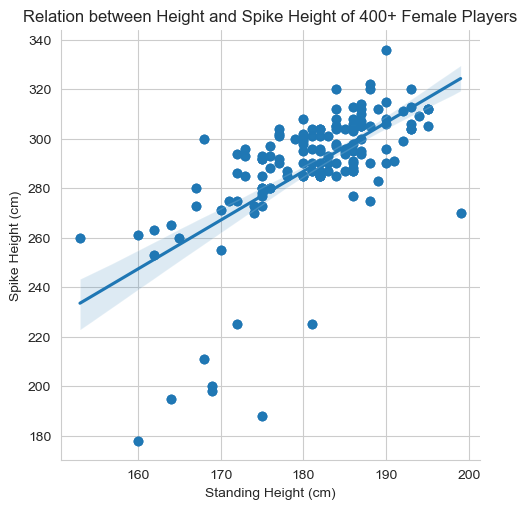

In [13]:
#Showing a linear regression plot of the height and spike height of the players

sns.lmplot(x='height',y='spike',data=df,fit_reg=True)
plt.xlabel("Standing Height (cm)")
plt.ylabel("Spike Height (cm)")
plt.title("Relation between Height and Spike Height of 400+ Female Players")

In [21]:
#Taking out unnecessary variables
del df['name'],df['date_of_birth'],df['weight'],df['country']

#Replace the position nubmers with letters and then renaming the columns
df['position_number']=df['position_number'].replace([1,2,3,4,6],['S','OH','MB','OP','L'])

df.rename(columns = {'height':'Height','position_number':'Position',
                    'spike':'Spike','block':'Block'}, inplace = True)

df

,index,Height,Spike,Block,Position
0,0,193,320,305,MB
1,1,182,295,284,S
2,2,190,306,296,OH
3,3,176,288,278,L
4,4,181,290,275,S
...,...,...,...,...,...
427,427,189,283,280,OH
428,428,184,298,295,MB
429,429,181,287,280,S
430,430,181,287,280,S


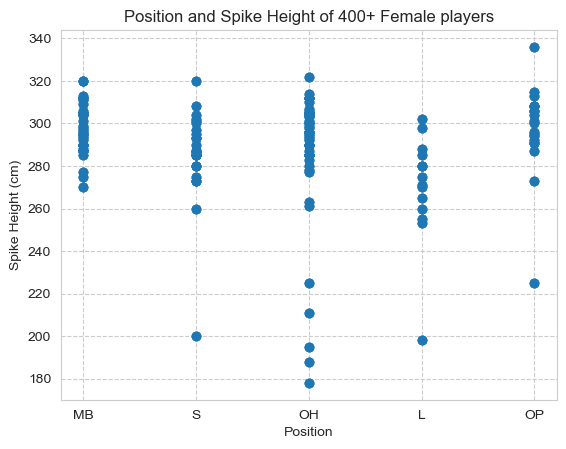

In [15]:
#Making a scatter plot of the position and spike height of the players
plt.scatter(df.Position,df.Spike)
plt.ylabel("Spike Height (cm)")
plt.xlabel("Position")
plt.title("Position and Spike Height of 400+ Female players")
plt.grid(linestyle = '--')


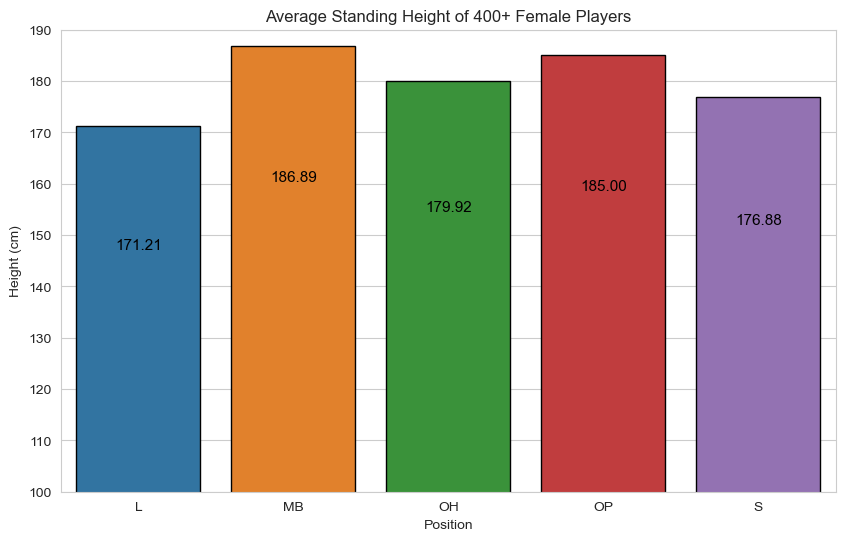

In [17]:
#This code was already used in the kaggle dataset
df = df.groupby('Position').mean()

plt.figure(figsize=(10,6))


g=sns.barplot(data=df,x=df.index,y='Height',edgecolor='black')
ax=g
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()/1.2),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

plt.ylabel("Height (cm)")
plt.ylim(100,190)
plt.title("Average Standing Height of 400+ Female Players")
plt.show()

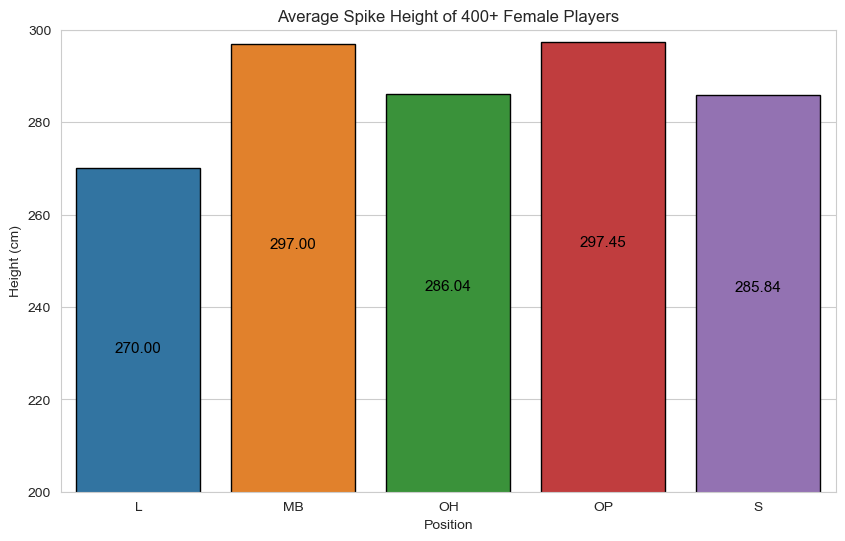

In [18]:
#Doing the same thing from the previous graph to the spike height

df = df.groupby('Position').mean()

plt.figure(figsize=(10,6))

#plt.ylim(250,300)
g=sns.barplot(data=df,x=df.index,y='Spike',edgecolor='black')
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 
    p.get_height()/1.2),ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),textcoords='offset points')

plt.ylabel("Height (cm)")
plt.ylim(200,300)

plt.title("Average Spike Height of 400+ Female Players")
plt.show()

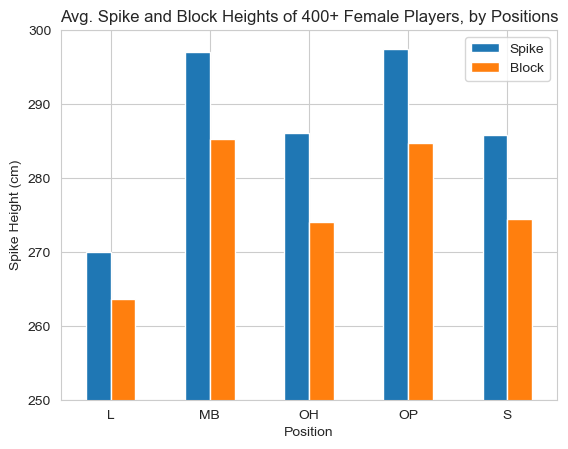

In [19]:
#Doing a comparison between spike and block height

r = round(df.groupby('Position').mean(),2).reset_index()
del r["Height"],r['index']
r.plot.bar(x='Position', rot=0)
plt.ylim(250,300)
plt.ylabel("Spike Height (cm)")
plt.title("Avg. Spike and Block Heights of 400+ Female Players, by Positions")
plt.show()